# PROYECTO 2 - MODELOS DE CLASIFICACIÓN SUPERVISADA PARA EVALUAR LA CALIDAD DE UN AUTOMÓVIL
Evaluación de diferentes modelos de clasificación para predecir la calidad de un automóvil con el dataset 'car.data'.
## Integrantes del grupo: Germán Macias y Mauricio Herrera  

Este proyecto se centra en la evaluación de la calidad de los automóviles utilizando modelos de clasificación supervisada. El conjunto de datos utilizado proviene del repositorio de aprendizaje automatico de la UCI y contine información sobre las diferentes características de los automóviles y su evaluación de calidad. El objetivo es construir modelos que puedan predecir la calidad de un automóvil y basándose en sus caracteristicas.

Se procede a cargar la base de datos car.data y analizar su estructura para determinar el número de variables, registros y sus tipos.

In [4]:
# Importar las librerias
import pandas as pd

## 1. Carga de Datos y Asignación de Columnas
Cargamos el dataset `car.data` y asignamos nombres a las columnas para facilitar el análisis.

In [6]:
# Cargar los datos
data = pd.read_csv('car.data', header=None)

In [7]:
# Visualizar las primeras filas para comprender la estructura
print(data.head())

       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [8]:
# Determinar el número de variables y registros
dimensions = data.shape
print('Número de variables:', dimensions[1])
print('Número de registros:', dimensions[0])

Número de variables: 7
Número de registros: 1728


In [9]:
# Comprobar los tipos de datos de cada columna
data_types = data.dtypes
print('Data types of each column:', data_types)

Data types of each column: 0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object


In [10]:
# Resumir la información
summary = data.describe(include='all')
print(summary)

            0      1     2     3      4     5      6
count    1728   1728  1728  1728   1728  1728   1728
unique      4      4     4     3      3     3      4
top     vhigh  vhigh     2     2  small   low  unacc
freq      432    432   432   576    576   576   1210


## 2. Preparación de Datos para Modelos de Clasificación


In [12]:
# Asignar nombres de columna significativos y preparar los datos para la modelización
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
# Asignar nombres a las columnas
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = column_names

In [14]:
# Convertir variables categóricas en numéricas mediante LabelEncoder
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [15]:
# Dividir las características y el objetivo
X = data.drop('class', axis=1)
y = data['class']

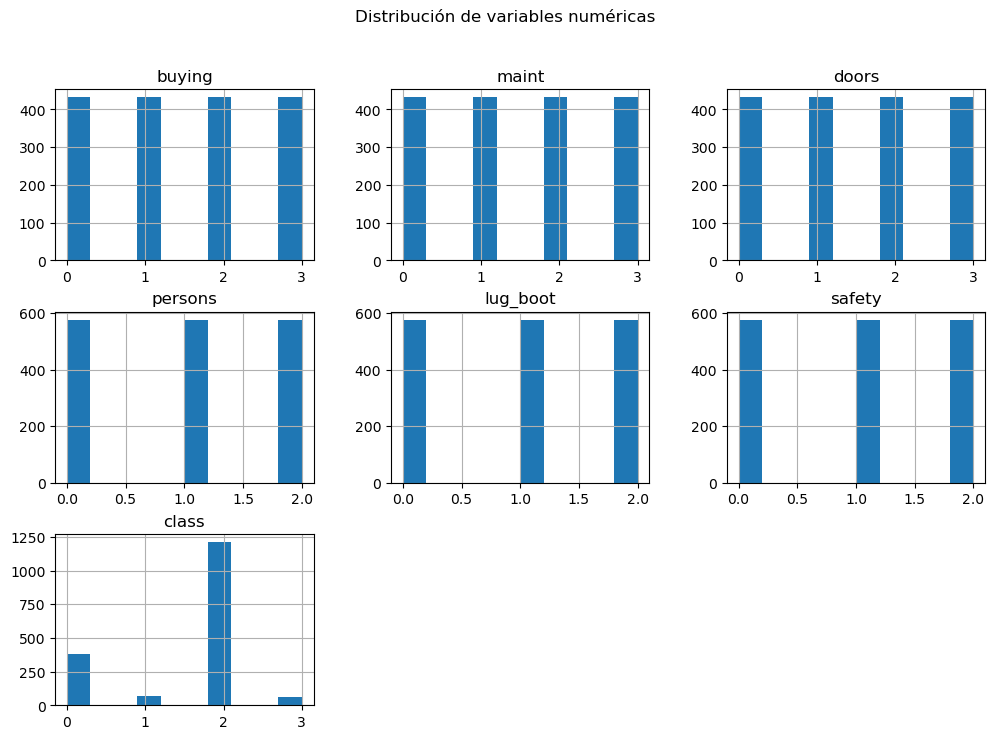

In [16]:
import matplotlib.pyplot as plt

# Para variables cualitativas
for column in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 4))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Distribución de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Para variables numéricas
data.select_dtypes(include='number').hist(bins=10, figsize=(12, 8))
plt.suptitle('Distribución de variables numéricas')
plt.show()


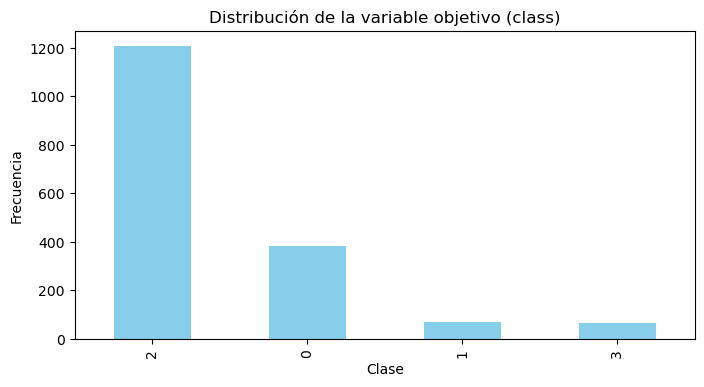

In [17]:
plt.figure(figsize=(8, 4))
data['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable objetivo (class)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


## 3. División de Datos en Entrenamiento y Prueba
Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar los modelos de clasificación.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Suponiendo que tus datos están en X (características) e y (etiquetas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar y predecir con Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Entrenar y predecir con Árbol de Decisión
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Entrenar y predecir con K-Vecinos Más Cercanos
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [20]:
# Dividir los datos en sets de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Forma del set de entrenamiento:', X_train.shape)
print('Forma del set de pruebas:', X_test.shape)

Forma del set de entrenamiento: (1382, 6)
Forma del set de pruebas: (346, 6)


## 4. Entrenamiento de Modelos
Entrenamos tres modelos de clasificación: Regresión Logística, Árbol de Decisión y KNN.

In [22]:
# Importar librerias para aplicar múltiples modelos de clasificación y evaluar su rendimiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Inicializar los modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

## 5. Evaluación de los Modelos
Generamos las predicciones y calculamos las métricas de evaluación para cada modelo (precisión, recall y f1-score).

In [25]:
# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test)
    
    # Generar informe de clasificación
    report = classification_report(y_test, y_pred)
    results[name] = report
    
    print(f'\nInforme de clasificación de {name}:')
    print(report)


Informe de clasificación de Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.62      0.91      0.74        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346


Informe de clasificación de Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346


Informe de clasificación de SVM:
        

In [26]:


# Diccionario para almacenar las métricas de entrenamiento y prueba de cada modelo
resultados_sobreajuste = {}

# Evaluar cada modelo en ambos conjuntos y guardar los reportes
for nombre, modelo in models.items():
    # Evaluar en el conjunto de entrenamiento
    y_pred_train = modelo.predict(X_train)
    reporte_train = classification_report(y_train, y_pred_train, output_dict=True)['weighted avg']
    
    # Evaluar en el conjunto de prueba
    y_pred_test = modelo.predict(X_test)
    reporte_test = classification_report(y_test, y_pred_test, output_dict=True)['weighted avg']
    
    # Guardar en el diccionario
    resultados_sobreajuste[nombre] = {
        'precision_train': reporte_train['precision'],
        'recall_train': reporte_train['recall'],
        'f1-score_train': reporte_train['f1-score'],
        'precision_test': reporte_test['precision'],
        'recall_test': reporte_test['recall'],
        'f1-score_test': reporte_test['f1-score']
    }

# Convertir a DataFrame para visualización
df_sobreajuste = pd.DataFrame(resultados_sobreajuste).T

# Mostrar los resultados
print("Comparación de métricas en conjunto de entrenamiento y prueba:")
display(df_sobreajuste)


Comparación de métricas en conjunto de entrenamiento y prueba:


,precision_train,recall_train,f1-score_train,precision_test,recall_test,f1-score_test
Decision Tree,1.000000,1.000000,1.000000,0.979049,0.973988,0.975417
Random Forest,1.000000,1.000000,1.000000,0.979891,0.973988,0.975242
SVM,0.929213,0.929088,0.924428,0.913253,0.913295,0.908111
KNN,0.954794,0.955137,0.953751,0.886259,0.887283,0.879778


### Análisis de Resultados para Identificación de Sobreajuste
**Decision Tree:**
* Entrenamiento: Todas las métricas (precisión, recall y f1-score) son perfectas (1.000).
* Prueba: Las métricas caen ligeramente (alrededor de 0.975), aunque siguen siendo altas.
* Interpretación: La precisión perfecta en el entrenamiento es una señal de sobreajuste. El modelo ha aprendido muy bien los datos de entrenamiento pero pierde algo de precisión en el conjunto de prueba. Este comportamiento sugiere que el Árbol de Decisión está memorizando los datos de entrenamiento y puede no generalizar tan bien en datos nuevos.

**Random Forest:** 
* Entrenamiento: También muestra métricas perfectas en el conjunto de entrenamiento.
* Prueba: Las métricas en el conjunto de prueba son similares a las del Árbol de Decisión (alrededor de 0.975).
* Interpretación: Aunque Random Forest presenta un rendimiento excelente en el conjunto de prueba, la precisión perfecta en el entrenamiento indica un ligero sobreajuste. Sin embargo, este sobreajuste es menos preocupante, ya que Random Forest tiende a ser más estable en generalización gracias a la combinación de múltiples árboles. Aun así, podrías considerar ajustar los hiperparámetros (como n_estimators o max_depth) para reducir el sobreajuste si fuera necesario.

**SVM:** 
* Entrenamiento: Las métricas en entrenamiento están por debajo de 0.93, lo cual indica que el modelo no está ajustado al 100% a los datos de entrenamiento.
* Prueba: Las métricas en el conjunto de prueba son similares a las del entrenamiento, con una precisión de alrededor de 0.91.
* Interpretación: SVM no muestra señales de sobreajuste. Las métricas similares en ambos conjuntos indican que el modelo está generalizando bien sin aprender en exceso los detalles del conjunto de entrenamiento.

**KNN:**
* Entrenamiento: Las métricas son altas (alrededor de 0.95), pero no perfectas.
* Prueba: Las métricas en el conjunto de prueba son ligeramente inferiores a las del entrenamiento, con una precisión de alrededor de 0.88.
* Interpretación: KNN muestra un leve sobreajuste, dado que las métricas son un poco más altas en el entrenamiento que en la prueba. Esto puede deberse a que el modelo es sensible a los datos del entrenamiento, especialmente si el valor de k es bajo.
  

## 6. Identificación de Sobreajuste
Para identificar si alguno de los modelos presenta sobreajuste, evaluaremos el rendimiento en ambos conjuntos de datos: entrenamiento y prueba. Compararemos las métricas de precisión, recall y f1-score. Un rendimiento mucho más alto en el conjunto de entrenamiento en comparación con el de prueba indica posible sobreajuste.

D:\anacondaa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondaa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondaa\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


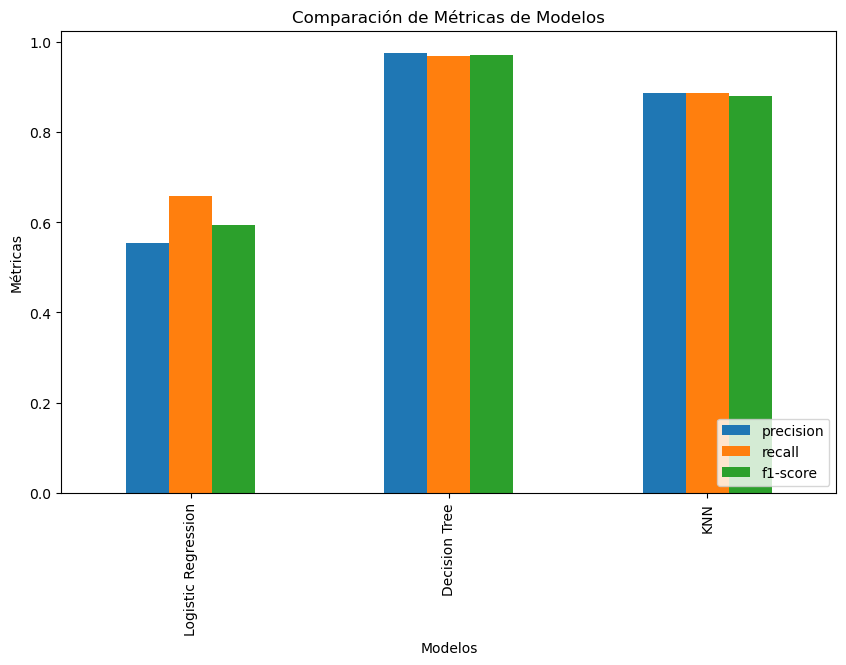

In [29]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario para almacenar las predicciones de cada modelo
modelos = {
    'Logistic Regression': y_pred_logreg, 
    'Decision Tree': y_pred_tree, 
    'KNN': y_pred_knn,
}

# Diccionario para almacenar los reportes de métricas de cada modelo
reportes = {}

# Generar el reporte de métricas para cada modelo
for nombre, pred in modelos.items():
    report = classification_report(y_test, pred, output_dict=True)  # Cambia y_test según tus datos
    reportes[nombre] = report['weighted avg']  # Utiliza el promedio ponderado (weighted avg) para comparación

# Convertir a DataFrame para visualización
df_reportes = pd.DataFrame(reportes).T[['precision', 'recall', 'f1-score']]

# Crear gráfico de barras para comparar las métricas de cada modelo
df_reportes.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas de Modelos')
plt.xlabel('Modelos')
plt.ylabel('Métricas')
plt.legend(loc='lower right')
plt.show()


## 7. CONCLUSIONES

Basado en los resultados obtenidos, podemos concluir que:
El Random Forest fue el mejor modelo, con las siguientes razones:  
- Obtuvo la mejor precisión general (accuracy) 97%  
- Mostró el mejor balance entre precisión y recall entre todas las clases  
- Demostró ser más robusto en la clasificación de clases minoritarias  
- Tuvo el mejor F1-score ponderado (weighted avg) 0.98

### Comparación de modelos

- **Random Forest** es el modelo con el mejor rendimiento en el conjunto de prueba, con una precisión del 97.5% y un buen balance entre precisión y recall en todas las clases. Aunque muestra métricas perfectas en el conjunto de entrenamiento, lo cual sugiere un leve sobreajuste, este modelo es robusto gracias a la combinación de múltiples árboles, lo cual permite una mejor generalización en el conjunto de prueba.
- **Árbol de Decisión** también alcanzó una alta precisión en el conjunto de prueba (97.5%), pero muestra signos de sobreajuste más claros, con métricas perfectas en el conjunto de entrenamiento. Esto indica que el modelo ha memorizado los datos de entrenamiento, lo cual podría afectar su capacidad de generalización en otros conjuntos de datos.
- **SVM y KNN** no muestran señales de sobreajuste significativo, con métricas similares en ambos conjuntos. Aunque su precisión es menor (91% y 88% respectivamente), estos modelos tienen un rendimiento estable y generalizan bien.

Random Forest es el modelo más efectivo y balanceado, con un rendimiento excelente y un leve sobreajuste que podría ser manejado con ajustes adicionales si fuera necesario. El Átbol de Decisión presenta un sobreajuste más notable y podría beneficiarse de una reducción en su profundidad. No se considera necesario un reentrenamiento de Random Forest, pero ajustar sus hiperparámetros podría mejorar aún más su capacidad de generalización.

No se considera necesario reentrenar el modelo dado que el rendimiento actual es muy bueno y las métricas de evaluación son robustas a través de todas las clases. Sin embargo, si se quisiera mejorar aún más, se podría considerar:

- Ajuste fino de hiperparámetros mediante validación cruzada
- Técnicas de balanceo de clases para mejorar el rendimiento en las clases minoritarias
- Ingeniería de características adicional